In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import manifold


In [2]:
dfb = pd.read_csv('trb_vdj_kmer_mhc.csv')
dfb = dfb[['crd3_encode', 'v.seg_0', 'v.seg_1', 'v.seg_2', 'v.seg_3', 'v.seg_4', 'v.seg_5',
              'j.segm_0', 'j.segm_1', 'j.segm_2', 'j.segm_3',
              'mhc.a_0', 'mhc.a_1', 'mhc.a_2', 'mhc.a_3', 'mhc.a_4', 'mhc.a_5', 'mhc.a_6', 'mhc.b_label', 'mhc.class', 'antigen_label']]
dfb = dfb.drop_duplicates()
dfb_vdj = dfb[['v.seg_0', 'v.seg_1', 'v.seg_2', 'v.seg_3', 'v.seg_4', 'v.seg_5',
              'j.segm_0', 'j.segm_1', 'j.segm_2', 'j.segm_3']].fillna(0)
dfb_mhc = dfb[['mhc.a_0', 'mhc.a_1', 'mhc.a_2', 'mhc.a_3', 'mhc.a_4', 'mhc.a_5', 'mhc.a_6', 'mhc.b_label', 'mhc.class']]

vdjb_lists = dfb_vdj.values.tolist()
mhcb_lists = dfb_mhc.values.tolist()


In [3]:
dfa = pd.read_csv('tra_vdj_kmer_mhc1.csv')
dfa = dfa[['crd3_encode', 'v.seg_0', 'v.seg_1', 'v.seg_2', 'v.seg_3', 'v.seg_4', 'v.seg_5',
              'j.segm_0', 'j.segm_1', 'j.segm_2', 'j.segm_3',
              'mhc.a_0', 'mhc.a_1', 'mhc.a_2', 'mhc.a_3', 'mhc.a_4', 'mhc.a_5', 'mhc.a_6', 'mhc.b_label', 'mhc.class', 'antigen_label']]
dfa = dfa.drop_duplicates()
dfa_vdj = dfa[['v.seg_0', 'v.seg_1', 'v.seg_2', 'v.seg_3', 'v.seg_4', 'v.seg_5',
              'j.segm_0', 'j.segm_1', 'j.segm_2', 'j.segm_3']].fillna(0)
dfa_mhc = dfa[['mhc.a_0', 'mhc.a_1', 'mhc.a_2', 'mhc.a_3', 'mhc.a_4', 'mhc.a_5', 'mhc.a_6', 'mhc.b_label', 'mhc.class']]

vdja_lists = dfa_vdj.values.tolist()
mhca_lists = dfa_mhc.values.tolist()

In [4]:
dfc = pd.read_csv('combined_vdj_kmer_mhc.csv')
dfc = dfc[['v.seg_0_x', 'v.seg_1_x', 'v.seg_2_x', 'v.seg_3_x', 'v.seg_4_x', 'v.seg_5_x',
               'v.seg_0_y', 'v.seg_1_y', 'v.seg_2_y', 'v.seg_3_y', 'v.seg_4_y', 'v.seg_5_y',
               'd.segm_0_x', 'd.segm_1', 'd.segm_2',
               'j.segm_0_x', 'j.segm_1_x', 'j.segm_2_x', 'j.segm_3_x', 'j.segm_4', 'j.segm_5',
               'j.segm_0_y', 'j.segm_1_y', 'j.segm_2_y', 'j.segm_3_y',
               'mhc.a_0', 'mhc.a_1', 'mhc.a_2', 'mhc.a_3', 'mhc.a_4', 'mhc.a_5', 'mhc.a_6', 'mhc.b_label', 'mhc.class', 'crd3_encode_x', 'crd3_encode_y', 'antigen_label']]
dfc = dfc.drop_duplicates()
dfc_vdj = dfc[['v.seg_0_x', 'v.seg_1_x', 'v.seg_2_x', 'v.seg_3_x', 'v.seg_4_x', 'v.seg_5_x',
               'v.seg_0_y', 'v.seg_1_y', 'v.seg_2_y', 'v.seg_3_y', 'v.seg_4_y', 'v.seg_5_y',
               'd.segm_0_x', 'd.segm_1', 'd.segm_2',
               'j.segm_0_x', 'j.segm_1_x', 'j.segm_2_x', 'j.segm_3_x', 'j.segm_4', 'j.segm_5',
               'j.segm_0_y', 'j.segm_1_y', 'j.segm_2_y', 'j.segm_3_y']].fillna(0)
dfc_mhc = dfc[['mhc.a_0', 'mhc.a_1', 'mhc.a_2', 'mhc.a_3', 'mhc.a_4', 'mhc.a_5', 'mhc.a_6', 'mhc.b_label', 'mhc.class']]

vdjc_lists = dfc_vdj.values.tolist()
mhcc_lists = dfc_mhc.values.tolist()


In [5]:
import ast
a_cdr3_kmer = list(dfa['crd3_encode'].apply(lambda x: ast.literal_eval(x)))
b_cdr3_kmer = list(dfb['crd3_encode'].apply(lambda x: ast.literal_eval(x)))
c_cdr3_kmer = list(dfc['crd3_encode_x'].apply(lambda x: ast.literal_eval(x)) + dfc['crd3_encode_y'].apply(lambda y: ast.literal_eval(y)))

In [6]:
antigena_label = dfa['antigen_label'].tolist()
antigenb_label = dfb['antigen_label'].tolist()
antigenc_label = dfc['antigen_label'].tolist()
# type(antigen_label)

In [9]:
##########PCA#############
pca = PCA(n_components = 50)
a_pca_data = pca.fit_transform(a_cdr3_kmer)
b_pca_data = pca.fit_transform(b_cdr3_kmer)
c_pca_data = pca.fit_transform(c_cdr3_kmer)

# tsne = manifold.TSNE(n_components=50, init='pca', learning_rate=100)
# reduced1_data = tsne.fit_transform(list(cdr3_kmer))

# plt.figure(figsize=(30,20))
# plt.scatter(reduced1_data[:, 0], reduced1_data[:, 1], c = antigen_label, cmap='Spectral',
#             marker='.', s = 20, alpha = 1/4)

In [12]:
a_tcr_list = []
for cdr3, vdj, mhc in zip(a_pca_data, vdja_lists, mhca_lists):
    a_tcr_list.append(list(cdr3) + vdj + mhc)
    

b_tcr_list = []
for cdr3, vdj, mhc in zip(b_pca_data, vdjb_lists, mhcb_lists):
    b_tcr_list.append(list(cdr3) + vdj + mhc)


c_tcr_list = []
for cdr3, vdj, mhc in zip(c_pca_data, vdjc_lists, mhcc_lists):
    c_tcr_list.append(list(cdr3) + vdj + mhc)

In [14]:
############TSNE##########
import numpy as np
tsne = manifold.TSNE(n_components=2, init='pca', learning_rate=100)
a_reduced_data = tsne.fit_transform(np.array(a_tcr_list))
b_reduced_data = tsne.fit_transform(np.array(b_tcr_list))
c_reduced_data = tsne.fit_transform(np.array(c_tcr_list))

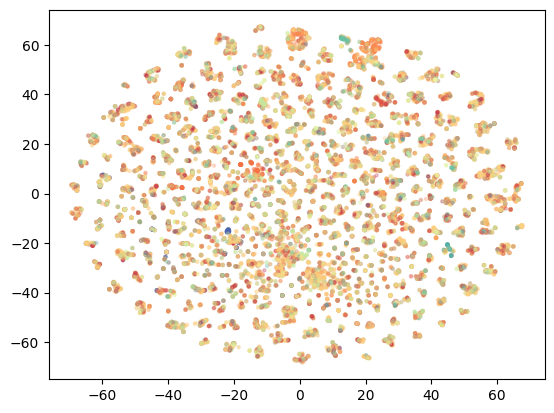

In [15]:

plt.scatter(a_reduced_data[:, 0], a_reduced_data[:, 1], c = antigena_label, cmap='Spectral',
            marker='.', s = 20, alpha = 1/4)



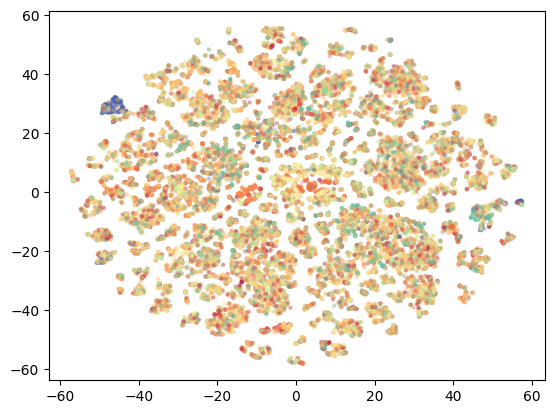

In [16]:
plt.scatter(b_reduced_data[:, 0], b_reduced_data[:, 1], c = antigenb_label, cmap='Spectral',
            marker='.', s = 20, alpha = 1/4)


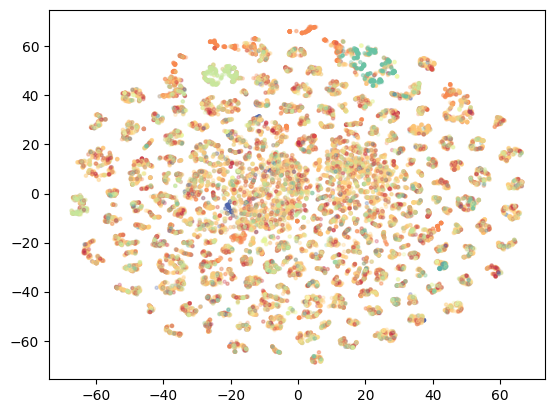

In [17]:

plt.scatter(c_reduced_data[:, 0], c_reduced_data[:, 1], c = antigenc_label, cmap='Spectral',
            marker='.', s = 20, alpha = 1/4)